# y-intercept coding test
## GONG Yanbin, ygongae@connect.ust.hk
### This code is for y-intercept coding test. I will use the data provided to do some basic data analysis and backtesting.
### The implementation is supported by GitHub Copilot, so should not be used in production.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import bottleneck as bn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import kstest, spearmanr

from Backtesting import Backtesting
from Strategy import Strategy

In [2]:
data = pd.read_csv('data.csv')
data.head()

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100


In [3]:
price = data.pivot(index = 'date', columns = 'ticker', values = 'last').sort_index()
volume = data.pivot(index = 'date', columns = 'ticker', values = 'volume').sort_index()
print(price.shape)
print(volume.shape)

(2005, 248)
(2005, 248)


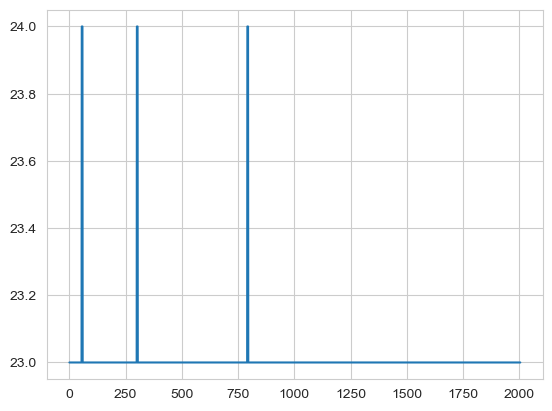

In [4]:
# Check the number of NaN for each day
plt.plot(np.nansum(np.isnan(price),axis=1))

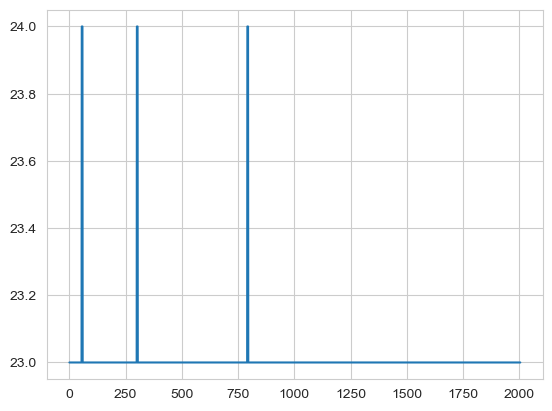

In [5]:
plt.plot(np.nansum(np.isnan(volume),axis=1))

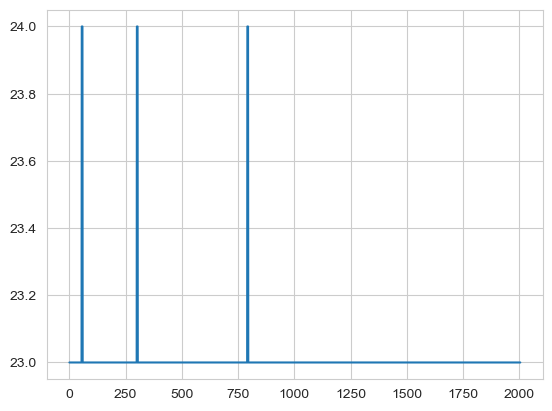

In [6]:
plt.plot(np.nansum(np.isnan(volume),axis=1))

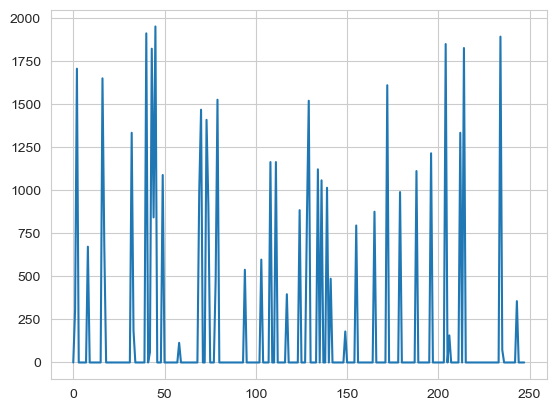

In [7]:
# So we know basically the number of NaN for each row is the same and quite stable
# We further check by col, so we know if we only miss some stocks
plt.plot(np.nansum(np.isnan(price),axis=0))

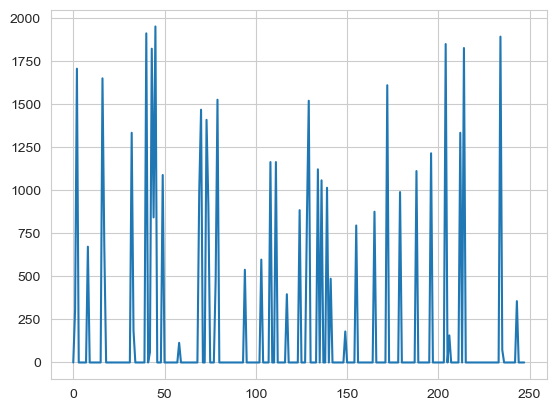

In [8]:
plt.plot(np.nansum(np.isnan(volume),axis=0))

In [9]:
# We reasonably assume that missing data is for date/ticker.

<Axes: ylabel='Density'>

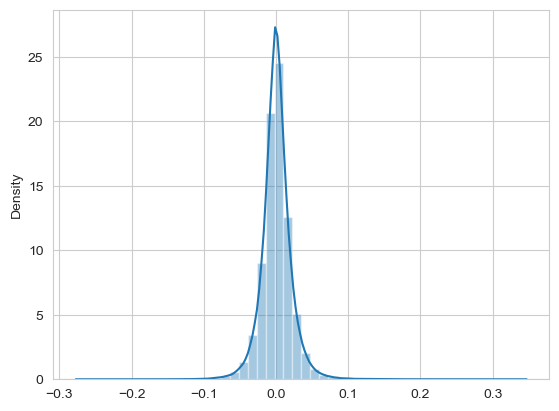

In [10]:
daily_return = price / price.shift(1) - 1.
# visualize the return distribution
sns.distplot(daily_return)

In [11]:
# check the normality of daily return by KS test
rets = daily_return.values.flatten()
rets = rets[~np.isnan(rets)]
rets = (rets - np.mean(rets)) / np.std(rets)
kstest(rets, 'norm')
### p-value is close to zero
### reject the null hypothesis
### daily return doesn't follow a normal distribution


KstestResult(statistic=0.06148658772225102, pvalue=0.0, statistic_location=0.5525585832195486, statistic_sign=1)

<Axes: ylabel='Density'>

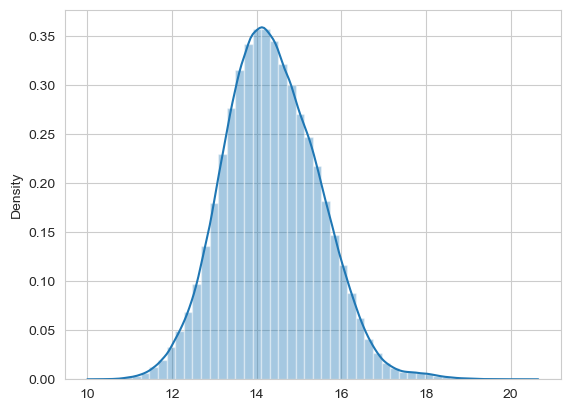

In [12]:

volume_1d = volume.values.flatten()
volume_1d[volume_1d == 0] = np.nan
sns.distplot(np.log(volume_1d))

In [13]:

volume_1d = volume_1d[~np.isnan(volume_1d)]
volume_1d = (volume_1d - np.mean(volume_1d)) / np.std(volume_1d)
kstest(volume_1d, 'norm')
### p-value is close to zero
### reject the null hypothesis
### log volume doesn't follow a normal distribution

KstestResult(statistic=0.3415464831018567, pvalue=0.0, statistic_location=-0.4059823854783966, statistic_sign=-1)

# Strategy and Backtesting

## I try some popular strategies with some common hyperparameters. Most of the strategies are from Zura Kakushadze's book <em> 151 Trading Strategies </em>

In [14]:
strats = Strategy(price, volume)
backtest = Backtesting(price)

# Momentum

In [15]:
momentum_20 = strats.momentum(20)
backtest.get_result(momentum_20)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,7.49,82.06,10.96,7.49,-1.08,20130926,20131025,65.22
2014,-2.05,-20.63,6.86,-3.01,-1.94,20140106,20141210,52.00
2015,-2.47,-24.85,12.84,-1.94,-3.52,20150105,20151210,48.00
2016,-11.74,-118.29,10.08,-11.74,-11.43,20160104,20161226,20.00
2017,0.99,9.97,6.01,1.66,-1.34,20170302,20170428,56.00
2018,0.57,5.79,8.57,0.68,-1.51,20180417,20180601,48.00
2019,1.62,16.29,10.03,1.62,-2.45,20190802,20191101,52.00
2020,10.79,108.73,22.24,4.89,-3.43,20200521,20200716,68.00
2021,2.12,88.95,5.70,15.62,-0.11,20210119,20210202,66.67
total,21.22,26.87,11.85,2.27,-4.24,20150121,20151228,53.27


<Axes: ylabel='Density'>

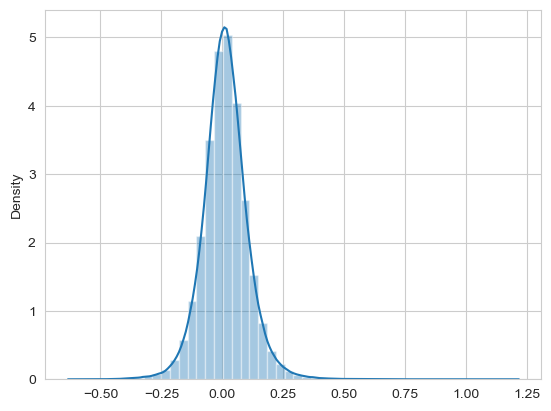

In [16]:
sns.distplot(momentum_20)

In [17]:
momentum_60 = strats.momentum(60)
backtest.get_result(momentum_60)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,4.56,60.46,9.24,6.54,-1.29,20130417,20130603,57.89
2014,-3.55,-35.75,6.37,-5.62,-2.96,20140121,20141210,48.00
2015,2.53,25.49,11.36,2.24,-3.05,20150120,20150430,60.00
2016,-9.66,-97.39,13.18,-7.39,-9.55,20160202,20161226,28.00
2017,6.66,67.14,8.69,7.72,-1.31,20170531,20170712,68.00
2018,4.08,41.08,9.58,4.29,-1.71,20180615,20180730,48.00
2019,2.82,28.47,9.70,2.93,-1.88,20190104,20190305,56.00
2020,10.22,103.02,19.04,5.41,-2.73,20200403,20200716,76.00
2021,3.28,137.66,6.43,21.39,0.00,20210104,20210104,100.00
total,17.66,22.82,11.18,2.04,-9.08,20160212,20170630,54.36


<Axes: ylabel='Density'>

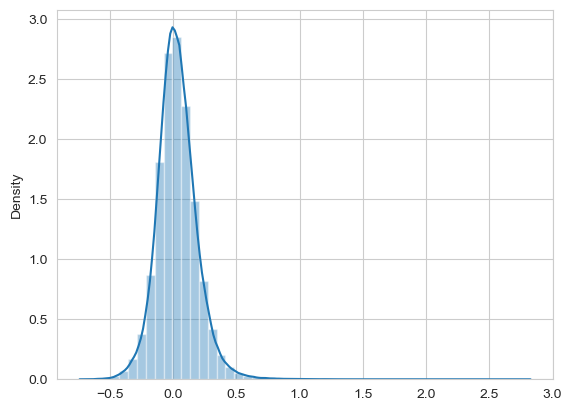

In [18]:
sns.distplot(momentum_60)

In [19]:
relative_strength_10_5 = strats.relative_strength(10, 5)
backtest.get_result(relative_strength_10_5)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,4.62,48.55,7.99,6.08,-0.95,20130121,20130305,70.83
2014,-1.01,-10.21,6.46,-1.58,-1.47,20141111,20141210,44.00
2015,3.88,39.10,8.80,4.44,-1.77,20150105,20150304,56.00
2016,-5.00,-50.44,10.57,-4.77,-7.56,20160104,20160812,40.00
2017,-1.08,-10.85,6.14,-1.77,-1.41,20171010,20171221,48.00
2018,-0.15,-1.52,7.44,-0.20,-2.44,20180202,20181108,40.00
2019,-0.87,-8.80,11.40,-0.77,-4.39,20190620,20191216,44.00
2020,4.48,45.11,11.73,3.85,-2.72,20200507,20200818,56.00
2021,3.95,165.98,8.24,20.14,-0.19,20210304,20210318,83.33
total,27.67,34.86,8.68,4.02,-4.50,20190620,20200120,60.00


<Axes: ylabel='Density'>

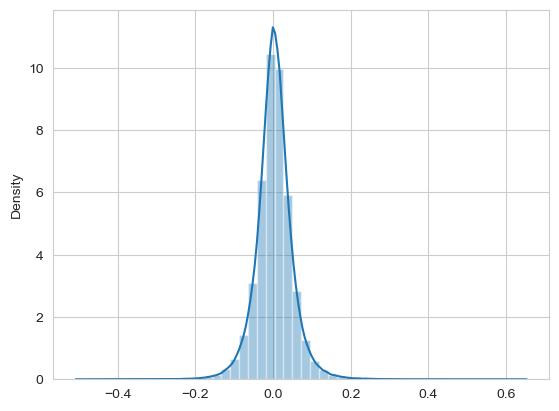

In [20]:
sns.distplot(relative_strength_10_5)

In [21]:
relative_strength_20_10 = strats.relative_strength(20, 10)
backtest.get_result(relative_strength_20_10)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,5.09,55.75,7.61,7.32,-1.06,20130926,20131025,65.22
2014,-1.43,-14.42,5.62,-2.57,-2.00,20140121,20141225,44.00
2015,-2.85,-28.73,11.60,-2.48,-3.85,20150120,20151210,44.00
2016,-3.60,-36.29,13.73,-2.64,-5.44,20160217,20161226,44.00
2017,2.78,27.98,6.99,4.00,-1.13,20170316,20170727,64.00
2018,-0.04,-0.41,8.07,-0.05,-1.56,20180615,20181011,52.00
2019,2.40,24.16,10.08,2.40,-2.92,20190204,20190403,52.00
2020,1.91,19.27,12.23,1.58,-3.57,20200521,20200716,60.00
2021,-0.11,-4.57,5.09,-0.90,-0.32,20210119,20210202,50.00
total,10.92,13.83,9.77,1.42,-3.46,20200520,20210212,55.78


<Axes: ylabel='Density'>

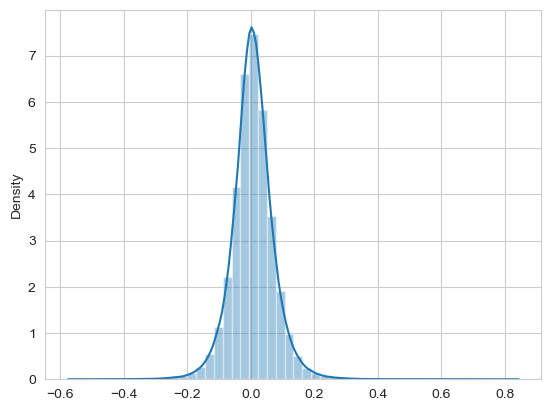

In [22]:
sns.distplot(relative_strength_20_10)

# Price Position

In [23]:
price_position_10 = strats.price_position(10)
backtest.get_result(price_position_10)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,-5.83,-91.79,12.49,-7.35,-2.16,20130204,20130502,8.33
2014,-2.93,-38.83,5.99,-6.48,-0.45,20140106,20140121,20.00
2015,2.07,23.68,8.00,2.96,-0.83,20150105,20150203,44.00
2016,-7.70,-96.98,10.30,-9.42,-0.35,20160104,20160217,8.00
2017,-1.86,-21.30,9.32,-2.28,-0.61,20170104,20170119,40.00
2018,-2.65,-37.13,7.17,-5.18,-0.33,20180119,20180219,25.00
2019,-3.44,-41.24,9.80,-4.21,0.00,20190104,20190104,24.00
2020,7.85,94.23,21.64,4.36,-1.22,20200618,20200915,37.50
2021,1.07,45.09,4.01,11.25,-0.33,20210119,20210217,66.67
total,-16.96,-25.75,12.27,-2.10,-2.16,20130204,20130502,32.50


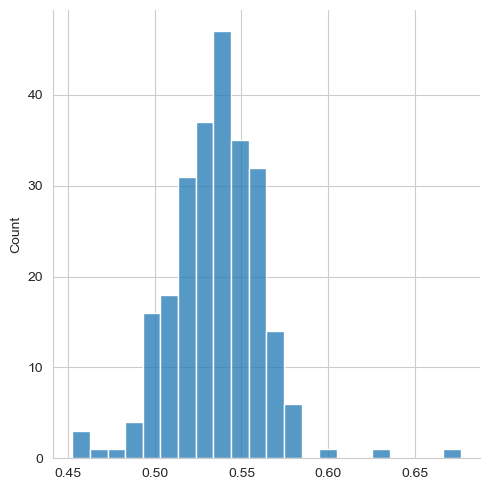

In [24]:
sns.displot(price_position_10.mean())

In [25]:
twap_position_10 = strats.twap_position(10)
backtest.get_result(twap_position_10)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,-1.31,-13.77,7.10,-1.94,-3.01,20130827,20131125,45.83
2014,-1.55,-15.64,3.64,-4.30,-1.29,20140730,20141225,44.00
2015,2.88,29.02,5.43,5.34,-0.72,20150729,20150826,60.00
2016,0.20,2.06,6.45,0.32,-1.63,20160202,20160728,52.00
2017,0.91,9.14,4.23,2.16,-0.58,20170428,20170628,60.00
2018,-2.03,-20.48,4.49,-4.56,-2.19,20180319,20181221,40.00
2019,-1.83,-18.41,6.11,-3.01,-1.97,20190121,20190819,52.00
2020,-4.30,-43.39,11.43,-3.80,-4.52,20200204,20201229,32.00
2021,0.04,1.71,2.05,0.83,-0.24,20210217,20210318,50.00
total,-5.20,-6.55,5.62,-1.17,-8.04,20130827,20201228,50.00


<Axes: ylabel='Density'>

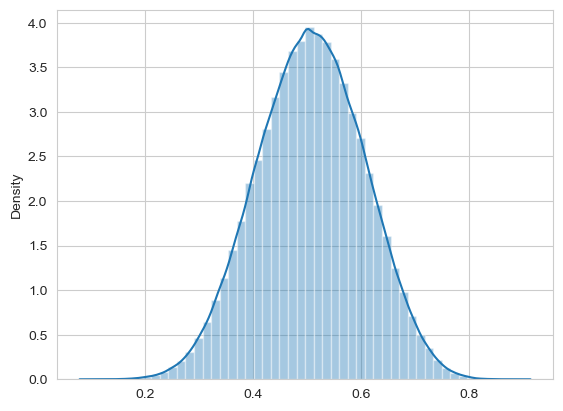

In [26]:
sns.distplot(twap_position_10)

# Different derivative levels return

In [27]:
volatility_20 = strats.volatility(20)
backtest.get_result(volatility_20)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,10.84,113.80,15.53,7.33,-1.45,20130520,20130603,66.67
2014,-1.85,-18.66,7.93,-2.35,-1.96,20140121,20140417,48.00
2015,0.15,1.49,9.21,0.16,-4.12,20150909,20151210,60.00
2016,7.37,74.29,18.77,3.96,-3.06,20160119,20160202,68.00
2017,2.12,21.32,5.17,4.12,-1.66,20170414,20170727,68.00
2018,-4.09,-41.21,11.22,-3.67,-5.62,20180119,20181221,48.00
2019,-4.07,-41.02,11.98,-3.42,-4.52,20190417,20191230,52.00
2020,1.38,13.90,14.12,0.98,-2.34,20200219,20200403,44.00
2021,3.06,128.45,10.28,12.49,-0.30,20210217,20210304,66.67
total,3.90,4.92,12.57,0.39,-13.58,20141217,20200501,53.50


<Axes: ylabel='Density'>

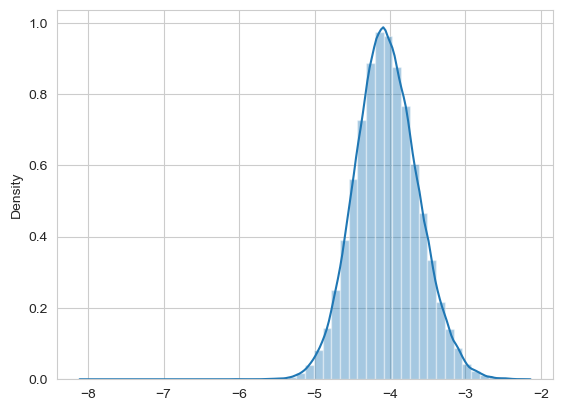

In [28]:
sns.distplot(np.log(volatility_20))

In [29]:
skewness_20 = strats.skewness(20)
backtest.get_result(skewness_20)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,4.29,45.04,6.04,7.46,-0.80,20131025,20131224,62.5
2014,1.28,12.88,4.36,2.95,-0.97,20140730,20141027,52.0
2015,-0.16,-1.59,4.84,-0.33,-1.20,20150812,20151126,48.0
2016,-5.19,-52.33,6.49,-8.07,-5.18,20160119,20161125,44.0
2017,0.85,8.59,4.44,1.93,-0.93,20170119,20170428,52.0
2018,-0.65,-6.51,4.91,-1.33,-1.83,20180104,20180518,52.0
2019,-2.06,-20.75,5.74,-3.62,-3.12,20190104,20190606,36.0
2020,3.34,33.66,11.47,2.93,-1.30,20200319,20200417,52.0
2021,1.84,77.15,3.76,20.50,0.00,20210104,20210104,100.0
total,8.50,10.71,6.26,1.71,-3.63,20150121,20170602,57.0


<Axes: ylabel='Density'>

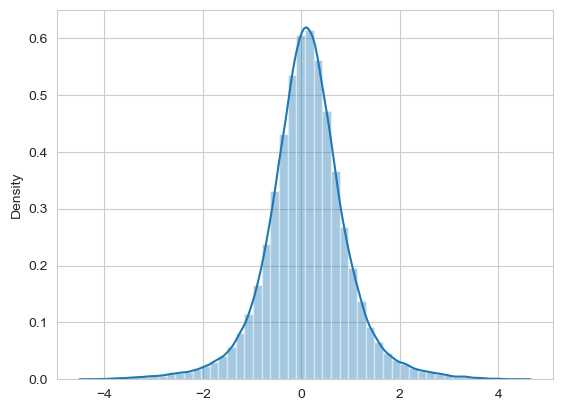

In [30]:
sns.distplot(skewness_20)

In [31]:
kurtosis_20 = strats.kurtosis(20)
backtest.get_result(kurtosis_20)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,3.20,33.57,6.00,5.59,-0.79,20130520,20130603,58.33
2014,0.18,1.86,3.64,0.51,-0.99,20140715,20141010,56.00
2015,1.14,11.52,3.86,2.99,-0.55,20150203,20150602,56.00
2016,0.66,6.70,8.24,0.81,-2.88,20160518,20161026,48.00
2017,0.98,9.86,3.86,2.55,-0.47,20170810,20171010,48.00
2018,0.75,7.59,4.33,1.75,-0.97,20180629,20180827,52.00
2019,-1.73,-17.49,4.58,-3.82,-2.91,20190104,20191017,24.00
2020,-0.45,-4.54,8.46,-0.54,-2.27,20200319,20201116,44.00
2021,1.30,54.48,4.39,12.42,0.00,20210104,20210104,83.33
total,7.47,9.42,6.01,1.57,-3.78,20150827,20191017,49.00


<Axes: ylabel='Density'>

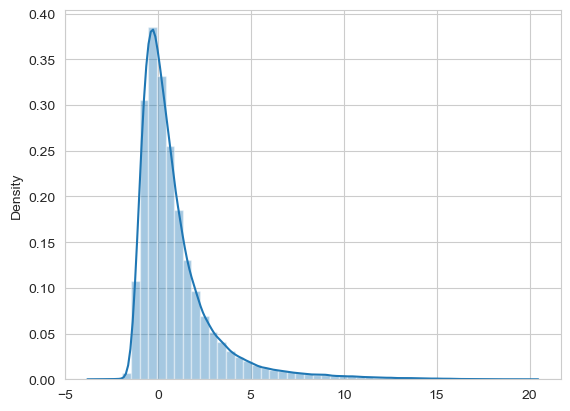

In [32]:
sns.distplot(kurtosis_20)

# Divergence

In [33]:
divergence_20 = strats.path_distance_ratio(20)
backtest.get_result(np.log(divergence_20))

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,-2.35,-26.93,8.74,-3.08,-1.61,20130319,20130403,39.13
2014,2.74,27.62,6.58,4.20,-0.87,20140926,20141010,56.00
2015,-1.92,-19.37,18.65,-1.04,-4.21,20150519,20150826,44.00
2016,9.42,95.00,15.04,6.32,-2.09,20160518,20160615,72.00
2017,-0.92,-9.28,7.19,-1.29,-3.42,20170414,20171207,48.00
2018,-0.10,-0.99,8.35,-0.12,-3.13,20180305,20181122,48.00
2019,-0.21,-2.08,8.77,-0.24,-4.03,20190403,20190802,52.00
2020,-4.20,-42.30,10.00,-4.23,-3.76,20200106,20201030,20.00
2021,-2.11,-88.62,9.27,-9.56,-1.44,20210104,20210318,16.67
total,-5.34,-6.83,10.32,-0.66,-1.61,20130319,20130403,49.25


<Axes: ylabel='Density'>

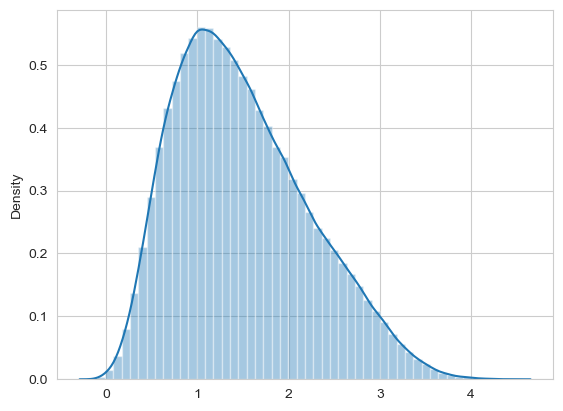

In [34]:
sns.distplot(np.log(divergence_20))

In [35]:
price_volume_correlation_20 = strats.price_volume_correlation(20)
backtest.get_result(price_volume_correlation_20)

,period return,annual return,annual volatility,sharpe ratio,max drawdown,max drawdown begin date,max drawdown end date,win rate
2013,7.03,77.05,9.17,8.41,-0.86,20130910,20131111,69.57
2014,-1.10,-11.09,4.51,-2.46,-1.48,20140106,20140403,44.00
2015,-2.41,-24.30,6.18,-3.93,-3.31,20150105,20151210,32.00
2016,-3.48,-35.11,6.07,-5.78,-3.25,20160104,20161226,40.00
2017,1.67,16.81,6.40,2.63,-0.94,20171122,20171221,60.00
2018,-1.13,-11.39,5.01,-2.27,-1.54,20180417,20181221,44.00
2019,-1.87,-18.88,5.74,-3.29,-2.73,20190204,20191230,24.00
2020,3.14,31.67,7.57,4.18,-0.86,20200521,20200716,52.00
2021,1.01,42.41,7.22,5.87,-0.19,20210217,20210304,66.67
total,12.12,15.35,6.70,2.29,-3.99,20190204,20210301,51.26
